<a href="https://colab.research.google.com/github/zsunberg/ai4all-berkeley-driving/blob/master/1-3 Intro to Self-Driving Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1-3 Intro to Self-Driving Cars

Hello! In this notebook we'll explain the problem we'll be tackling during the program!

In [ ]:
## Google Colab Code to get everything set up
! git clone https://github.com/zsunberg/ai4all-berkeley-driving
%cd ai4all-berkeley-driving/

In [ ]:
# Get the Dependencies for the Colab Notebook
! pip install stable-baselines
! pip install celluloid
! pip install numpy==1.17.0

In [ ]:
# di
import warnings
warnings.filterwarnings("ignore")

In [1]:
from driving.ui import *

## State, Actions, and Reward 

For our toy problem, we've tried to simplify the task as much as possible to make training an RL autonomous driving agent to be as straightforward as possible. As disucssed before, we have to specify at least 3 things in order to have a complete RL problem: the state, reward, and possible action. 

## The State

The state itself is the easiest part of the project. For the purposes of our project, our car, Clementine, is represented by an (x,y) pair. Additionally, Clementine can be facing a certain direction, given by an angle (called theta), ranging from 0 to 360 degrees. Below is an image of the track we'll be working with. ![Image of the Track](assets/self_driving_car.PNG) 

As we can see, in the above image, Clementine is roughly around the the x coordinate of 1.4, the y coordinate of 0.3, and tilted about at about an angle of 10 degrees. Therefore, we represent the current state of Clementine as the list $(1.4, 0.3, 10)$



## The Action

The second part of the RL problem is specifying the possible actions that our action can take. RL problems require trying different actions available in order to understand which actions lead to the best reward. Since training Neural Nets can take a lot of time, we tried to reduce the number of actions that Clementine can take. Because Clementine exists in a simulation and safety isn't a concern, we've made Clementine move at a constant speed throughout the entire simulation.

This means that the only thing you have to worry about is getting Clementine to turn to stay on the track! We've given Clementine the ability to take 9 types of turns, all given by the degree of the turn: $(-35, -20, -10, -5, 0, 5, 10, 20, 35)$

To give an example, in state (1.5, 0.5, 0), Clementine is on the road facing forward. Since we want Clementine to stay on the road, the best action to take would probably be not turning at all (aka, making a turn of 0 degrees). Likewise, if Clementine started in state (0.25, 1.5, 0), we'd want Clementine to turn to get back on the road, but not too much as to overshoot it. In that case, a turn of 10 or possibly 20 degrees would be best. As we can see from this example, the best action depends heavily upon the state that Clementine is in.

## The Reward

In the final part of the RL problem, we specify what we mean by a "good" action. In other words, each action Clementine takes gives it a reward that tells it how good that action was. Becase we want Clementine to stay on the road, we want to give Clementine a reward for being close to the road, but then penalize Clementine for being too far away or off the track. 

Later, we'll have you design your own reward function to keep Clementine on the track, but, for the time being, we're providing a default reward function to let you train an initial model. In the image below, we explain two of the measures we use to calculate the reward:

![Image of Reward](assets/part_of_reward_function.png) 

The first measure we use is the distance between Clementine and the road. Take special note that this is measured by the distance of the state (x,y,theta), which is the center of Clementine, and the point on the road Clementine is closest to.

The second measure we use is the angle between where Clementine's going and the direction of the road (where the road is moving counterclockwise). 

The third measure that's not in the above picture is called the action penalty. The action penalty tries to discourage Clementine from taking too extreme turns, thereby encouraging Clementine to stay on the road, especially when the road is straight. The action penalty will be larger the larger the turn is. 

The default reward we give you works as follows: 


1. If Clementine is more than 0.1 away from the road but less than 2 away from the road, give Clementine a reward of -d - a - ap, where d is the distance of Clementine from the road, a is the angle between Clementine and the road, and ap is the action penalty.


2. If Clementine is more than 2 away from the road, give Clementine a reward of -20 and stop execution. 

Now it's important to note that this reward we gave you isn't the only reward that we could use for this problem. We could instead choose to design the reward function differently that prioritizes different parts of the map or actions. 

## The Policy

Now that we have a sense of state, actions, and reward, we need to figure out how to go from a state to an action, with information from the reward. We can think of the policy as a function with the state as a parameter, and it returns the function. To give an example, let's look at the following policy that always returns a single action.

In [2]:
# Let's Create the Environment Real Quick
env = DrivingEnv()
actions = env.actions # The actions


# This is a great policy, the best policy
def super_smart_policy(x,y,theta):
    # chosen_action = actions[4] # You can also use the actions
    chosen_action = 0 # Always go straight
    
    return chosen_action

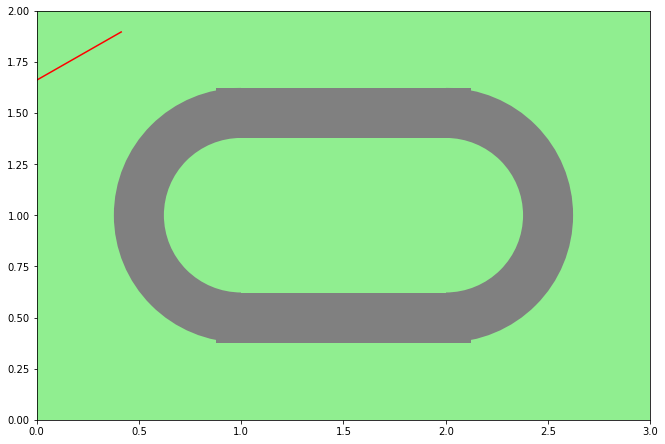

In [3]:
## Let's Visualize the Above Policy
plot_episode(env, super_smart_policy)

Obviously, the above policy didn't work all that well. Below, try writing a policy that works a bit better and gets the car to stay on the road! 

Things to consider:
1. How can we use the information of the state (x,y,theta) to get the car to stay on the road?
2. How can we use the distance/angle to get the car to stay on the road?
3. How can we use the reward to help the car stay on the road?

In [4]:
# Write your own policy and animate it! 
# Remember, a policy returns an action, how you choose that action is up to you!
# returns: an action
env = DrivingEnv()
actions = env.actions

def policy(x,y,theta):
    # If you want to use the reward or the distance/angle, the below code let's you do that!
#     d, ang = env.getDistanceAngle(x,y,theta) # This gives you the distance and angle described above
#     reward = env.reward(x,y,theta,actions[0]) # This is an example of how to get the reward given (x,y,theta) and (action)

    # Student Code Here:
    # The Below For-Loop is a Python way to go through the elements of a list, here we're
    # going over all the actions.
    for action in actions: 
        pass # Delete me and put code here!

    return -35 # Try choosing the action in a smarter way!

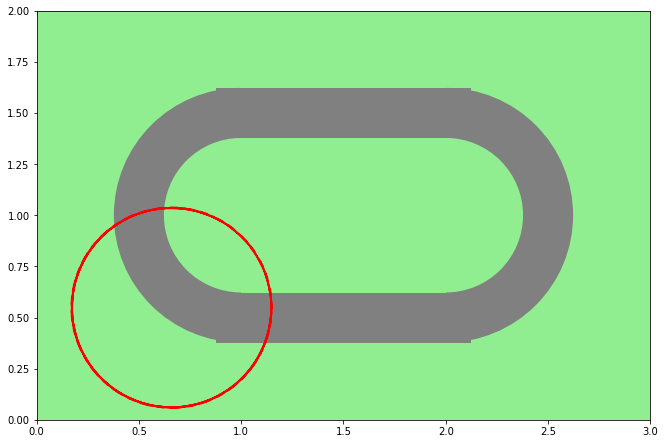

In [5]:
## Let's Visualize the Above Policy
plot_episode(env, policy)